# Lab 8: Unsupervised Learning

## Problem 9: Hierarchical Clustering in ```USArrests```

In [1]:
states=row.names(USArrests)
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [2]:
#a
USArrHC.complete = hclust(dist(USArrests), method="complete")

In [3]:
USArrHC.complete


Call:
hclust(d = dist(USArrests), method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 50 


Here, we clustered the states together using complete linkage (i.e, using the max after computing all the pairwise distance between clusters)

In [4]:
#b
v = cutree(USArrHC.complete, 3)

In [5]:
sortedV = sort(v)
sortedV

Alabama         Alaska        Arizona     California       Delaware 
             1              1              1              1              1 
       Florida       Illinois      Louisiana       Maryland       Michigan 
             1              1              1              1              1 
   Mississippi         Nevada     New Mexico       New York North Carolina 
             1              1              1              1              1 
South Carolina       Arkansas       Colorado        Georgia  Massachusetts 
             1              2              2              2              2 
      Missouri     New Jersey       Oklahoma         Oregon   Rhode Island 
             2              2              2              2              2 
     Tennessee          Texas       Virginia     Washington        Wyoming 
             2              2              2              2              2 
   Connecticut         Hawaii          Idaho        Indiana           Iowa 
             3              3              3              3              3 
        Kansas       Kentucky          Maine      Minnesota        Montana 
             3              3              3              3              3 
      Nebraska  New Hampshire   North Dakota           Ohio   Pennsylvania 
             3              3              3              3              3 
  South Dakota           Utah        Vermont  West Virginia      Wisconsin 
             3              3              3              3              3

We can see that the vector above has sorted out the states into three different clusters. The states in their clusters are similar in one way or another.

In [6]:
names(sortedV)

[1] "Alabama"        "Alaska"         "Arizona"        "California"    
 [5] "Delaware"       "Florida"        "Illinois"       "Louisiana"     
 [9] "Maryland"       "Michigan"       "Mississippi"    "Nevada"        
[13] "New Mexico"     "New York"       "North Carolina" "South Carolina"
[17] "Arkansas"       "Colorado"       "Georgia"        "Massachusetts" 
[21] "Missouri"       "New Jersey"     "Oklahoma"       "Oregon"        
[25] "Rhode Island"   "Tennessee"      "Texas"          "Virginia"      
[29] "Washington"     "Wyoming"        "Connecticut"    "Hawaii"        
[33] "Idaho"          "Indiana"        "Iowa"           "Kansas"        
[37] "Kentucky"       "Maine"          "Minnesota"      "Montana"       
[41] "Nebraska"       "New Hampshire"  "North Dakota"   "Ohio"          
[45] "Pennsylvania"   "South Dakota"   "Utah"           "Vermont"       
[49] "West Virginia"  "Wisconsin"

In [7]:
#FIXME: some way to automate this process?
#Cluster 1:
sortedV[1:16]

#Cluster 2:
sortedV[17:30]

#Cluster 3:
sortedV[31:50]

Alabama         Alaska        Arizona     California       Delaware 
             1              1              1              1              1 
       Florida       Illinois      Louisiana       Maryland       Michigan 
             1              1              1              1              1 
   Mississippi         Nevada     New Mexico       New York North Carolina 
             1              1              1              1              1 
South Carolina 
             1

Arkansas      Colorado       Georgia Massachusetts      Missouri 
            2             2             2             2             2 
   New Jersey      Oklahoma        Oregon  Rhode Island     Tennessee 
            2             2             2             2             2 
        Texas      Virginia    Washington       Wyoming 
            2             2             2             2

Connecticut        Hawaii         Idaho       Indiana          Iowa 
            3             3             3             3             3 
       Kansas      Kentucky         Maine     Minnesota       Montana 
            3             3             3             3             3 
     Nebraska New Hampshire  North Dakota          Ohio  Pennsylvania 
            3             3             3             3             3 
 South Dakota          Utah       Vermont West Virginia     Wisconsin 
            3             3             3             3             3

In [8]:
ClusterA = USArrests[names(sortedV[1:16]),]
ClusterB = USArrests[names(sortedV[17:30]),]
ClusterC = USArrests[names(sortedV[31:50]),]

ClusterA
ClusterB
ClusterC

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
California,9.0,276,91,40.6
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Illinois,10.4,249,83,24.0
Louisiana,15.4,249,66,22.2
Maryland,11.3,300,67,27.8
Michigan,12.1,255,74,35.1


,Murder,Assault,UrbanPop,Rape
Arkansas,8.8,190,50,19.5
Colorado,7.9,204,78,38.7
Georgia,17.4,211,60,25.8
Massachusetts,4.4,149,85,16.3
Missouri,9.0,178,70,28.2
New Jersey,7.4,159,89,18.8
Oklahoma,6.6,151,68,20.0
Oregon,4.9,159,67,29.3
Rhode Island,3.4,174,87,8.3
Tennessee,13.2,188,59,26.9


,Murder,Assault,UrbanPop,Rape
Connecticut,3.3,110,77,11.1
Hawaii,5.3,46,83,20.2
Idaho,2.6,120,54,14.2
Indiana,7.2,113,65,21.0
Iowa,2.2,56,57,11.3
Kansas,6.0,115,66,18.0
Kentucky,9.7,109,52,16.3
Maine,2.1,83,51,7.8
Minnesota,2.7,72,66,14.9
Montana,6.0,109,53,16.4


Through this and quickly eyeballing through the features of each cluster, it seems like Cluster A has the most amount of crime, C has the least amount of crime, and Cluster B is in the middle. This can be reinforced by looking at the summary of each of these subsets/clusters.

In [9]:
summary(ClusterA)
summary(ClusterB)
summary(ClusterC)

     Murder         Assault         UrbanPop          Rape      
 Min.   : 5.90   Min.   :236.0   Min.   :44.00   Min.   :15.80  
 1st Qu.:10.30   1st Qu.:251.2   1st Qu.:55.50   1st Qu.:21.95  
 Median :11.75   Median :261.0   Median :71.00   Median :26.95  
 Mean   :11.81   Mean   :272.6   Mean   :68.31   Mean   :28.38  
 3rd Qu.:13.50   3rd Qu.:287.2   3rd Qu.:80.25   3rd Qu.:32.85  
 Max.   :16.10   Max.   :337.0   Max.   :91.00   Max.   :46.00  

     Murder          Assault         UrbanPop          Rape      
 Min.   : 3.400   Min.   :145.0   Min.   :50.00   Min.   : 8.30  
 1st Qu.: 5.325   1st Qu.:156.8   1st Qu.:60.75   1st Qu.:18.98  
 Median : 7.650   Median :167.5   Median :69.00   Median :23.10  
 Mean   : 8.214   Mean   :173.3   Mean   :70.64   Mean   :22.84  
 3rd Qu.: 8.950   3rd Qu.:189.5   3rd Qu.:79.50   3rd Qu.:26.73  
 Max.   :17.400   Max.   :211.0   Max.   :89.00   Max.   :38.70  

     Murder        Assault          UrbanPop          Rape      
 Min.   :0.80   Min.   : 45.00   Min.   :32.00   Min.   : 7.30  
 1st Qu.:2.50   1st Qu.: 56.75   1st Qu.:51.75   1st Qu.:11.03  
 Median :3.55   Median : 94.00   Median :59.50   Median :14.55  
 Mean   :4.27   Mean   : 87.55   Mean   :59.75   Mean   :14.39  
 3rd Qu.:6.00   3rd Qu.:110.75   3rd Qu.:67.50   3rd Qu.:16.88  
 Max.   :9.70   Max.   :120.00   Max.   :83.00   Max.   :22.90  

In [10]:
USArrests$Murder

[1] 13.2 10.0  8.1  8.8  9.0  7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2  2.2
[16]  6.0  9.7 15.4  2.1 11.3  4.4 12.1  2.7 16.1  9.0  6.0  4.3 12.2  2.1  7.4
[31] 11.4 11.1 13.0  0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 13.2 12.7  3.2  2.2
[46]  8.5  4.0  5.7  2.6  6.8

In [11]:
seq(min(USArrests$Murder), max(USArrests$Murder))

[1]  0.8  1.8  2.8  3.8  4.8  5.8  6.8  7.8  8.8  9.8 10.8 11.8 12.8 13.8 14.8
[16] 15.8 16.8

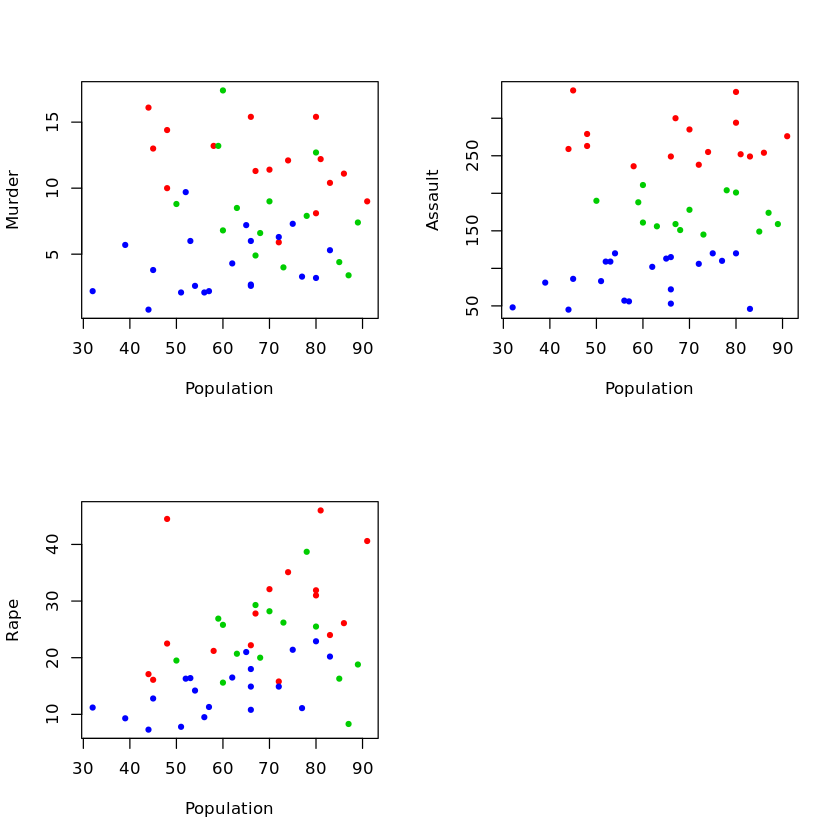

In [12]:
par(mfrow=c(2,2))
plot(USArrests$UrbanPop, USArrests$Murder, col=v+1, xlab="Population", ylab="Murder", pch=20)
plot(USArrests$UrbanPop, USArrests$Assault, col=v+1, xlab="Population", ylab="Assault", pch=20)
plot(USArrests$UrbanPop, USArrests$Rape, col=v+1, xlab="Population", ylab="Rape", pch=20)

Unsupervised learning is a lot of fun! These graphs show the plots of each type of crime. It seems like the Assault graph has the most noticable cluster separability.

In [13]:
scaledUSArrests = scale(USArrests)
head(scaledUSArrests)
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [14]:
#c
USArrScaledHC.complete = hclust(dist(scaledUSArrests), method="complete")

In [15]:
scaledV = sort(cutree(USArrScaledHC.complete, 3))
scaledV

Alabama         Alaska        Georgia      Louisiana    Mississippi 
             1              1              1              1              1 
North Carolina South Carolina      Tennessee        Arizona     California 
             1              1              1              2              2 
      Colorado        Florida       Illinois       Maryland       Michigan 
             2              2              2              2              2 
        Nevada     New Mexico       New York          Texas       Arkansas 
             2              2              2              2              3 
   Connecticut       Delaware         Hawaii          Idaho        Indiana 
             3              3              3              3              3 
          Iowa         Kansas       Kentucky          Maine  Massachusetts 
             3              3              3              3              3 
     Minnesota       Missouri        Montana       Nebraska  New Hampshire 
             3              3              3              3              3 
    New Jersey   North Dakota           Ohio       Oklahoma         Oregon 
             3              3              3              3              3 
  Pennsylvania   Rhode Island   South Dakota           Utah        Vermont 
             3              3              3              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [16]:
df = data.frame(sortedV, scaledV)

In [17]:
df

,sortedV,scaledV
Alabama,1,1
Alaska,1,1
Arizona,1,1
California,1,1
Delaware,1,1
Florida,1,1
Illinois,1,1
Louisiana,1,1
Maryland,1,2
Michigan,1,2


As we can see, scaling the variables produced different results in the clusters.

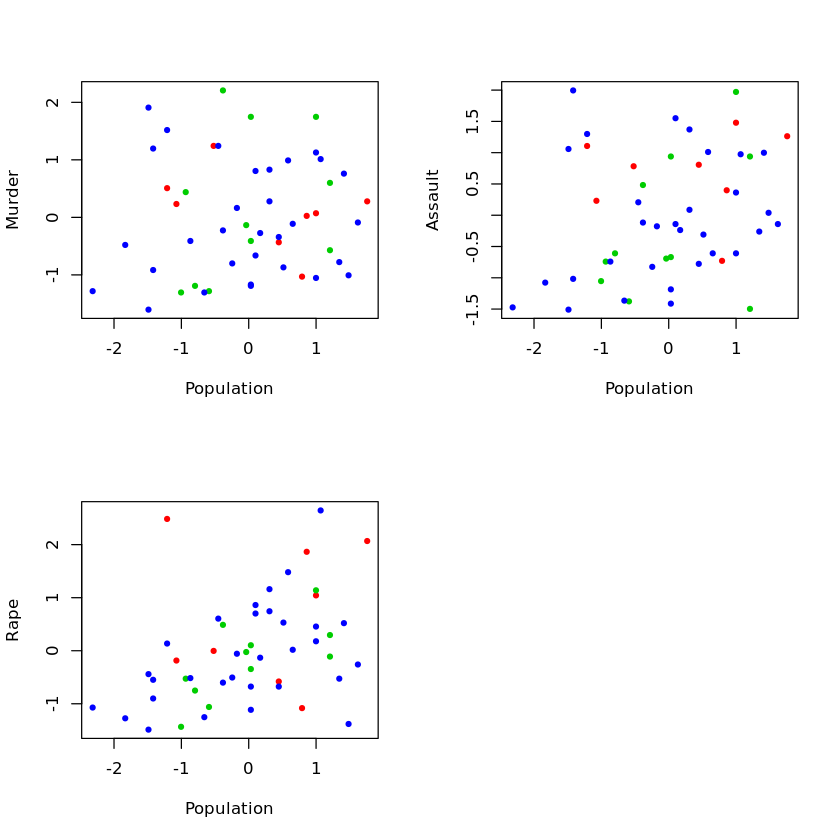

In [18]:
par(mfrow=c(2,2))
plot(scaledUSArrests[,"UrbanPop"], scaledUSArrests[,"Murder"], col=scaledV+1, xlab="Population", ylab="Murder", pch=20)
plot(scaledUSArrests[,"UrbanPop"], scaledUSArrests[,"Assault"], col=scaledV+1, xlab="Population", ylab="Assault", pch=20)
plot(scaledUSArrests[,"UrbanPop"], scaledUSArrests[,"Rape"], col=scaledV+1, xlab="Population", ylab="Rape", pch=20)

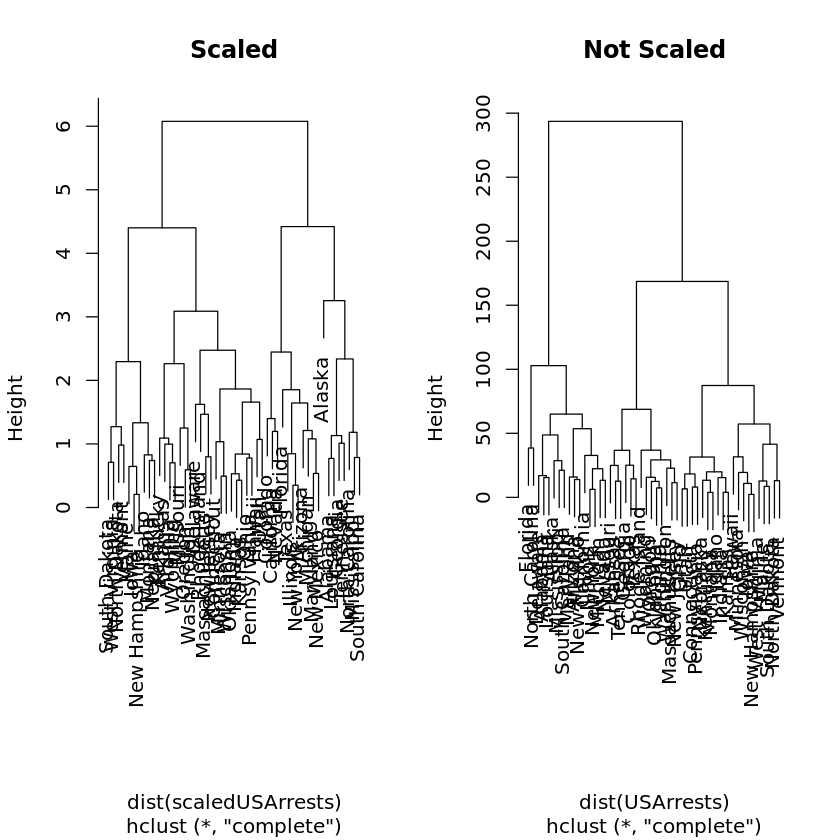

In [19]:
par(mfrow=c(1,2))
plot(USArrScaledHC.complete, main="Scaled")
plot(USArrHC.complete, main="Not Scaled")

In ideals and what I've been told, it makes sense to scale the variables. However, doing so makes the values hard to interpret. As seen from the colored graphs, the points seem to intersect within each other more than they would in the original unscaled one. Though it may not matter, since we're considering 4-D points.

The dendogram shows us that clusters look a little more uniform--the unscaled version seems to have one giant hierarchy on the right side, while the scaled version has a much more evenly-distributed hierarchies. This means that the distances between the groups doesn't vary so much and might be better because it would consider states that are more similar to be within similar clusters.

There is a big difference between the points assigned to clusters in each version--there are fewer 1's and 2's and many more 3's. I would go for the scaled version for better results, but the unscaled for better interpretability.

## Problem 10

In [20]:
?rnorm

In [21]:
x = rnorm(20, mean=1, sd=1)
x
y=vector()
y

[1] -0.1404332  1.5676627  1.0246392  0.3932908  0.2107956  2.4646706
 [7]  0.6606662  2.2205198  2.0547075 -0.7101345  0.3917617  1.1550537
[13] -0.2067238 -0.3903103  1.5596356  1.1735493  1.4232349  3.2269392
[19]  2.5558937  0.6738903

logical(0)

In [22]:
data = data.frame()

In [30]:
#a
set.seed(1)
data = data.frame()

#init
class = data.frame(x = rnorm(20, mean=2, sd=1))
for (j in (1:49)) {
    x_i = rnorm(20, mean=(j %% 10), sd=3)
    class=data.frame(class,x_i)
}
data = data.frame(class)

#adding two more classes
for (i in 2:3) {
    class = data.frame(x = rnorm(20, mean=3*i^2, sd=1))
    for (j in (1:49)) {
        x_i = rnorm(20, mean=(j %% 10), sd=3)
        class=data.frame(class,x_i)
    }
    data=rbind(data, class)
}

# to test to make sure they are differentish
dim(data)
data[1:5,1:3]
data[21:25,1:3]
data[41:45,1:3]

[1] 60 50

x,x_i,x_i.1
1.373546,3.756932,1.50642921
2.183643,3.346409,1.23991496
1.164371,1.223695,4.09089013
3.595281,-4.968055,3.66998960
2.329508,2.859477,-0.06626708


,x,x_i,x_i.1
21,13.13497,0.02053122,3.4114684
22,13.11193,3.32201564,2.8346559
23,11.12922,3.35501920,-0.9337088
24,12.21073,3.28973824,-0.7797584
25,12.06940,1.88442628,7.7593114


,x,x_i,x_i.1
41,26.11385,-4.204248,1.08848744
42,25.07775,-1.512214,2.95424210
43,28.61970,-1.147258,0.05375297
44,27.51927,2.124463,-3.60671303
45,26.94415,8.149984,-1.62098974


In [34]:
#b
pr.out = prcomp(data, scale=TRUE)
pr.out$rotation[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
x,-0.19898257,0.06147506,-0.09534452,0.149079640,-0.02913790
x_i,-0.04880132,0.01047339,0.16282947,-0.085117831,0.10479404
x_i.1,0.20919643,-0.05250318,-0.20094096,0.008751524,0.20342222
x_i.2,0.20064954,-0.02997476,0.02529637,0.331102211,0.08379668
x_i.3,0.07788428,0.06140932,0.08296977,-0.217267376,0.10811966


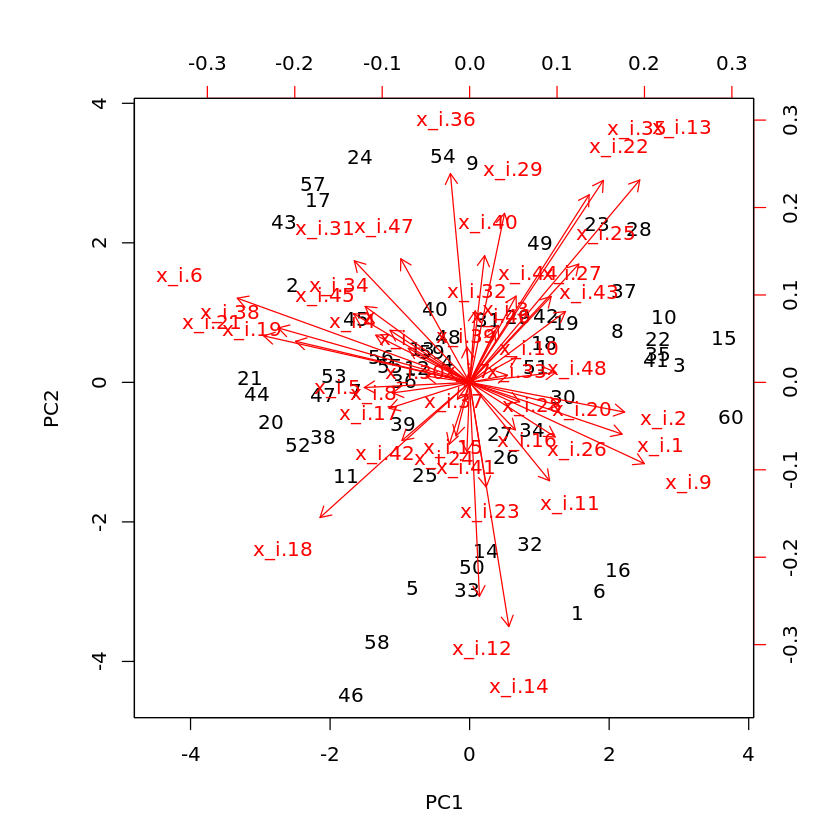

In [25]:
biplot(pr.out, scale=0)

Not 100% sure what this graph is telling me, but there's a cool explosion!

In [68]:
#d
km.out=kmeans(data, 2, nstart=20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [42]:
km.out$cluster[1:40]
km.out$cluster[41:60]

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

We had 3 clusters at the beginning, which means were separated by 3 * i^2. It makes sense that the first two original clusters were considered to be in the same cluster after running K-Means Clsutering, since they were closering together.

In [69]:
#e
km.out=kmeans(data, 4, nstart=20)
km.out$cluster

[1] 2 3 2 3 2 2 3 2 3 2 3 2 3 3 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

When using K = 4, the clusters for original class B and C were successfully separated! However, the class A was mixed between classes 2 and 3 here.

In [66]:
for (i in 1:5) {
    km.out=kmeans(data, 4, nstart=20)
    print(km.out$cluster)
}

 [1] 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 2 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1] 4 2 4 2 4 4 2 4 2 4 2 4 2 2 4 4 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [1] 3 2 3 2 3 3 2 3 2 3 2 3 2 2 3 3 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1] 1 4 2 4 1 2 4 2 4 4 4 1 4 4 1 2 4 4 4 4 1 2 1 1 2 2 1 2 2 1 1 1 1 2 1 1 2 1
[39] 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [1] 3 1 3 1 3 3 1 3 1 3 1 3 1 1 3 3 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[39] 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2


Running it several times adds no information; the Cluster A is consistently the one that gets clustered into different categories. It would be cool to see each iteration of the algorithm and watch the centroids converge step by step!

In [70]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [84]:
#e
km.out.pc=kmeans(pr.out$x[,1:2], 3, nstart=20)
km.out.pc

K-means clustering with 3 clusters of sizes 14, 17, 29

Cluster means:
          PC1        PC2
1  2.44894306  0.7847741
2  0.04683597 -2.1728709
3 -1.20970394  0.8948955

Clustering vector:
 [1] 2 3 1 3 2 2 3 1 3 1 2 3 3 2 1 2 3 1 1 3 3 1 1 3 2 2 2 1 3 1 3 2 2 2 1 3 1 2
[39] 2 3 1 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 2 3 1

Within cluster sum of squares by cluster:
[1] 16.08888 51.70008 78.24018
 (between_SS / total_SS =  62.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

PC in theory would give better results of how accurately the clusters were identified. However, because there are so many X_p predictors, principal component analysis couldn't find a good enough PC1 and PC2 which could explain the separability of the predictors well enough. Since we ran K-Means on a limited amount of "explanability of the variance," the resulting clusters are much more confused as opposed to if we just ran it on the original data (with all predictors).

In [85]:
#g
dsc = scale(data)
dsc[1:5,1:5]

x,x_i,x_i.1,x_i.2,x_i.3
-1.1859678,0.94084633,-0.2748953,2.35074823,-0.54513967
-1.1072931,0.80051072,-0.3637223,0.01545389,-0.09201219
-1.2062823,0.07487003,0.5864840,0.71290600,1.28074513
-0.9701982,-2.04175324,0.4462014,0.07978793,-1.54329518
-1.0931270,0.63405522,-0.7990619,-0.65813094,0.67014240


In [86]:
pr.out$x[1:5,1:5]

PC1,PC2,PC3,PC4,PC5
1.8585302,-3.4095650,1.627357,2.1922375,2.433713
-2.0673677,0.9987353,2.485418,-0.5614542,1.668022
2.8418156,0.5783606,-2.101352,0.3612014,1.674121
-0.2894201,0.3952242,-1.036140,1.0566738,-2.697590
-0.2211474,-3.3005173,2.558488,-1.3282640,-1.304906


In [88]:
km.out=kmeans(dsc, 3, nstart=20)
km.out$cluster
km.out.pc$cluster

[1] 3 1 2 2 3 3 3 2 1 2 3 1 1 3 2 3 1 2 2 1 1 2 2 1 3 3 2 2 2 2 1 3 3 2 2 1 2 1
[39] 1 1 2 2 1 1 1 3 1 2 2 3 2 3 1 2 1 1 1 3 1 2

[1] 2 3 1 3 2 2 3 1 3 1 2 3 3 2 1 2 3 1 1 3 3 1 1 3 2 2 2 1 3 1 3 2 2 2 1 3 1 2
[39] 2 3 1 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 2 3 1

Both ```scale()``` and __pca__ doesn't seem to do too well in this situation. I think this is because there aren't enough rows in the dataset for so many predictors. This could also be because there isn't enough separability in $X_1, ... X_p$. $X_0$ is separated by ```3 * i^2``` , but the rest of the variables were just separated mean 0, variance 1.